# Programming exercise 2: Split step Fourier method

Due on Monday, 05.11.2018, 14.15h

### Total: 100 points

## Defining the problem

We want to calculate the time evolution of a quantum particle in a on-dimensional potential, i.e. solve the initial value problem

$$ i\partial_t \psi(x,t) = \left[-\frac{1}{2} \partial_{x}^2 + V(x)\right] \psi(x,t) $$

with initial condition

$$ \psi(x,t=0) = \psi_0(x) $$

by representing the wave function $\psi(x,t)$ on a discrete spatial grid and propagating it using the split-step-Fourier method.

In [2]:
# load standard libraries

import numpy as np   # standard numerics library

import matplotlib.pyplot as plt   # for making plots

%matplotlib inline

### Exercise 1 (50 points)

Write a function that calculates the discrete Fourier transform of a wave function. Use only even numbers of grid points. You have learned that the spli-step-Fourier method automatically imposes periudic bounbdary conditions, so it makes sense to define the spatial grid like -L/2,-L/2+dx ... L/2-dx.

Test it by Fourier transforming functions where you know what the outcome should be, e.g. a constant function, a delta function etc.
Implement also the inverse Fourier transform. Make sure you get back the original function after applying the FT twice.

Numpy provides a fast Fourier transform module. Campare your manual FT the result of the fast Fourier algorithm. Pay special attention the ordering in which the Fourier components are retured by the FFT.

### Solution

1) "Manual" Fourier transform.

(4.440892098500626e-16+2.2204460492503132e-17j)
1.0
39.99999999999999


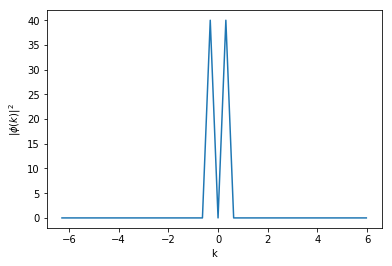

In [189]:
# define the grid
L = 20
npoints = 40
dx = L/npoints
xvals = np.linspace(-L/2,L/2,npoints,endpoint=False)

# momenta (assuming even number of points)
kvals = 2*np.pi/L*np.linspace(-npoints/2,npoints/2,npoints,endpoint=False)
dk = 2*np.pi/L;

# discrete Fourier transform
def FT(psi,x,k):
    return np.sum(psi*np.exp(-1j*x.reshape((1,npoints))*k.reshape((npoints,1))),axis=1)

# inverse Fourier transform
def iFT(phi,x,k):
    return 1/npoints*np.sum(phi*np.exp(1j*x.reshape((npoints,1))*k.reshape((1,npoints))),axis=1)

# set up test wave function (constant, cos-fct ...)
psi=np.ones(npoints)/np.sqrt(L)
for i in range(npoints):
    psi[i]=np.cos(2*np.pi*xvals[i]/L)/np.sqrt(L/2)

# transform
phi=FT(psi,xvals,kvals)
# transform back
psi2=iFT(phi,xvals,kvals)

plt.plot(kvals,np.abs(phi)**2)
plt.xlabel("k")
plt.ylabel("$|\phi(k)|^2$")

# compare back and forth transformed to original
print(max(psi2-psi))

# print the norm
print(sum(np.abs(psi)**2)*dx)
print(sum(np.abs(phi)**2)*dx)


2) Numpy FFT

39.99999999999999
(5.551115123125783e-17+3.162559705429917e-17j)


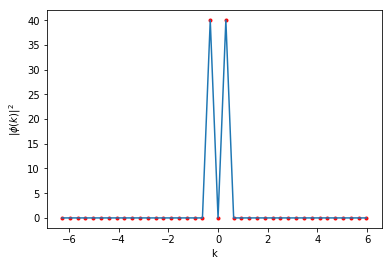

In [190]:
# the k-values
kvals2 = 2*np.pi*np.fft.fftfreq(npoints,d=dx)

# apply FFT and inverse FFT
phi2=np.fft.fft(psi)
psi2=np.fft.ifft(phi2)

# plot and compare to manual FT result
plt.plot(kvals2,np.abs(phi2)**2,'r.')
plt.plot(kvals,np.abs(phi)**2)
plt.xlabel("k")
plt.ylabel("$|\phi(k)|^2$")

# norm in k-space
print(sum(np.abs(phi2)**2)*dx)

# compare back and forth transformed to original
print(np.max(psi-psi2))

### Exercise 2 (50 points)

Implement the split step Fourier algorithm using the numpy FFT and iFFT functions.

Test your code by propagating a wave packet in free space. 

Calculate mean and variance at each time and plot them. Does you observation match your expectation?

Animate the time evolution of the wave packet as we did in exercise 5 of programming exercise 1.

Here are some example parameter that you could use:

In [ ]:
# define the grid
L = 20
npoints = 256

# parameters of the wave packet
x0 = -5;
sigma = 1;
p0 = 1;

#time steps
dt = 0.1;
tsteps = 50;

[[Bonus task (not graded): Compare the results to the exact analytical solution for a propagating wave packet. Try to increase the spatial and temporal step size to see how the error depends on them. You can also look at the wave packet in Fourier space, where the analytical solution is even simpler.]]

Let the wave packet from before evolve in a harmonic potential (with p0=0).

Again, calculate temporal evolution of mean and variance and visualize the wave packet evolution in an animation. Is what you observe consistent with your expectation? (A Gaussian wave packet in a harmonic potential is called a coherent state. What did you learn about these in your quantum mechanics lecture?)

Now simulate the scattering off a potential step $V(x)=\theta(x)$. Choose different initial velocities. Interpret your results. What happens when the reflected wave packet reaches the boundary of the spatial grid?

Example parameters:

In [ ]:
# define the grid
L = 40
npoints = 512

# parameters of the wave packet
x0 = -10;
sigma = 2;
p0 = 1;# try also 1.5 and 2

#time steps
dt = 0.1;
tsteps = 250;

[[Bonus question: Be creative! Let your wave packet propagate through a potential barrier, across a well, or down a step etc. Measure the reflected and transitted pobability (and the probability to be inside the barrier) as a function of time and study the transmission systematically as a function of the initial momentum...]]

### Solution

0.9999997414412163


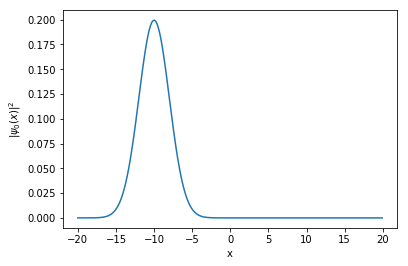

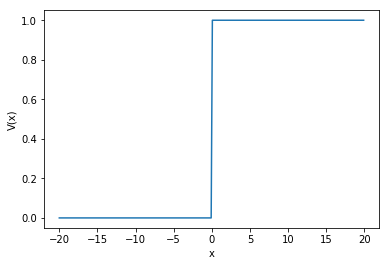

In [193]:
# define the grid
L = 40
npoints = 512
dx = L/npoints
xvals = np.linspace(-L/2,L/2,npoints,endpoint=False)
kvals = 2*np.pi*np.fft.fftfreq(npoints,d=dx)

# prepare a wave packet
x0 = -10;
sigma = 2;
p0 = 1.5;

gauss_wp = (1/np.sqrt(np.sqrt(2*np.pi)*sigma))*np.exp(-(xvals-x0)**2/(4*sigma**2) + 1j*p0*xvals)
# check normalization
print(sum(np.abs(gauss_wp)**2)*dx)

# plot the probability
plt.figure()
plt.plot(xvals,np.abs(gauss_wp)**2)
plt.xlabel("x")
plt.ylabel("$|\psi_0(x)|^2$")

# define the potential
#V = 0*xvals
#V = xvals**2
V = (1+np.sign(xvals))/2

# plot the potential
plt.figure()
plt.plot(xvals,V)
plt.xlabel("x")
plt.ylabel("V(x)")

# initialize psi
psi = gauss_wp

# propagate the wave packet
dt = 0.1;
tsteps = 250;
tvec = np.linspace(0,tsteps*dt,tsteps+1) # will have length tsteps+1

# container for storing the result
psit = 0j*np.zeros((tsteps+1,npoints))

# store initial value
psit[0] = psi

for i in range(tsteps):
    # apply potential
    psi = np.exp(-1j*dt*V)*psi
    # go to Fourier space
    psi = np.fft.fft(psi)
    # apply kinetic part
    psi = np.exp(-1j*dt*kvals**2/2)*psi
    # go back to real space
    psi=np.fft.ifft(psi)
    # store the result
    psit[i+1] = psi
    
    

0.9999997414412153


Text(0, 0.5, '$(\\Delta x)^2$')

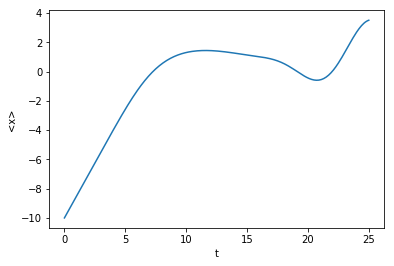

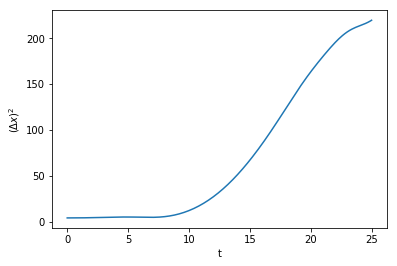

In [195]:
#check norm conservation
print((np.linalg.norm(psit,axis=1)**2*dx)[-1])

#plot mean and variance
xmean=np.sum(xvals*np.abs(psit)**2*dx,axis=1)
xvar=np.sum(xvals**2*np.abs(psit)**2*dx,axis=1)-xmean**2

plt.figure()
plt.plot(tvec,xmean)
plt.xlabel("t")
plt.ylabel("<x>")

plt.figure()
plt.plot(tvec,xvar)
plt.xlabel("t")
plt.ylabel("$(\Delta x)^2$")

Make an animation of the wave packet

In [98]:
from matplotlib import animation
from IPython.display import HTML

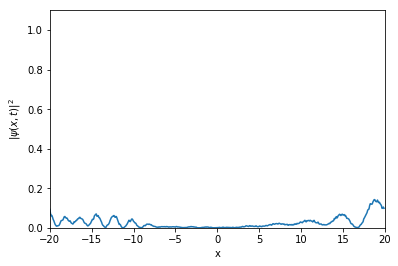

In [196]:
fig, ax = plt.subplots()
ax.set_xlim(( -L/2, L/2))
ax.set_ylim((0, 1.1))
ax.set_xlabel("x")
ax.set_ylabel("$|\psi(x,t)|^2$")
line, = ax.plot([],[])

def animate(it):
    y = np.abs(psit[it])**2
    line.set_data(xvals, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(tsteps), # t-values
                               interval=50, # wait time before displaying new frame in ms
                               blit=True)

HTML(anim.to_jshtml())